In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [115]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0, random_state=0)
y = np.reshape(y, (y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

dimensions de X: (100, 2)
dimensions de y: (100, 1)


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [117]:
X = X_train; y = y_train

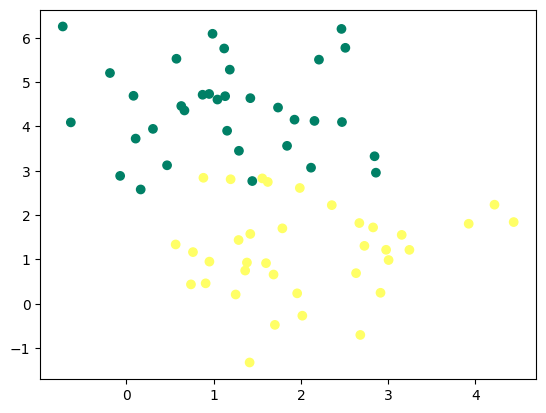

In [118]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')

In [119]:
def initialisation(X):
  params = {}
  # Generate a 2-dimensional array with shape (2, 1)
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)
  params["W"] = W
  params["b"] = b
  return params

In [120]:
params = initialisation(X)
params

{'W': array([[0.30611929],
        [1.36789832]]),
 'b': array([-0.52273763])}

In [121]:
# params["W"][0]
params["b"]

array([-0.52273763])

In [122]:
print(X[:, 0].min()); print(X[:, 0].max())

-0.7300001120785176
4.4384122962968195


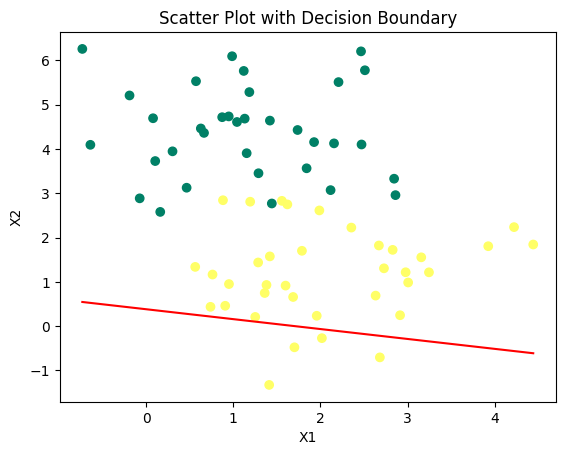

In [123]:
# initial model visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

# Calculate the corresponding values ​​for the y axis using the decision line equation
# W1 * x1 + W2 * x2 + b = 0 => y = -(W1 * x1 + b) / W2
y_values = -(params["W"][0] * x_values + params["b"]) / params["W"][1]

plt.plot(x_values, y_values, c='red')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot with Decision Boundary')
plt.show()

In [124]:
X.shape

(70, 2)

In [125]:
params["W"].shape

(2, 1)

In [126]:
params["b"].shape

(1,)

In [127]:
def model(X, params):
  Z = X.dot(params["W"]) + params["b"]
  return Z

In [128]:
Z = model(X, params)
Z.shape

(70, 1)

In [129]:
def activation(Z):
  return 1 / (1 + np.exp(-Z))

In [130]:
A = activation(Z)

In [131]:
A.shape

(70, 1)

In [132]:
def log_loss(y, A):
  return - 1 / len(y) * np.sum(y * np.log10(A) + (1 - y) * np.log10(1 - A))

In [133]:
err = log_loss(y, A)
err

1.2963843236763308

In [134]:
def gradients(X, y, A):
  grads = {}
  dW = 1/len(y) * np.dot(X.T, A - y)
  db = 1/len(y) * np.sum(A - y)

  grads["dW"] = dW
  grads["db"] = db

  return grads

In [135]:
grads = gradients(X, y, A)
grads

{'dW': array([[0.35389711],
        [2.07969294]]),
 'db': 0.3684799383784903}

In [136]:
def update(params, grads, learning_rate = 0.01):
  params["W"] = params["W"] - learning_rate * grads["dW"]
  params["b"] = params["b"] - learning_rate * grads["db"]

  return params

In [137]:
def predict(X, params):
  A = activation(model(X, params))
  print(A)
  return A >= 0.5

In [138]:
def artificial_neuron(X, y, epochs, learning_rate = 0.01):
  errors = []
  params = initialisation(X)

  for i in range(epochs):
    Z = model(X, params)
    A = activation(Z)
    err = log_loss(y, A)
    errors.append(err)
    #print(f"Epoch {i + 1}...................... log_loss: {err}")
    grads = gradients(X, y, A)
    params = update(params, grads, learning_rate)

  return errors, params

In [139]:
epochs = 1000
errors, params = artificial_neuron(X, y, epochs)

In [140]:
# final params
params

{'W': array([[ 1.40376793],
        [-1.22775617]]),
 'b': array([0.75356112])}

In [141]:
from sklearn.metrics import accuracy_score

In [142]:
# Model performance
print(accuracy_score(y, predict(X, params)))

[[6.92853166e-01]
 [2.65517119e-01]
 [9.31433465e-01]
 [9.63586773e-01]
 [5.97202726e-01]
 [4.78316765e-03]
 [7.78345799e-01]
 [7.57356789e-01]
 [9.51664657e-01]
 [1.01378739e-01]
 [8.12040579e-01]
 [1.62403800e-01]
 [3.52443544e-04]
 [5.66614213e-02]
 [9.78440798e-01]
 [9.91184240e-01]
 [2.50254394e-02]
 [5.27263372e-02]
 [4.88885697e-01]
 [3.49743008e-01]
 [9.89425298e-01]
 [9.95418714e-01]
 [9.80778524e-01]
 [4.14660503e-01]
 [4.98987105e-02]
 [9.61318812e-01]
 [9.09884156e-01]
 [2.16811192e-01]
 [2.72766228e-03]
 [3.23419812e-02]
 [2.10345500e-02]
 [3.11296311e-02]
 [2.48025241e-02]
 [8.67110169e-01]
 [2.35354167e-02]
 [7.45022545e-03]
 [7.15494992e-01]
 [8.10990476e-02]
 [7.64071455e-01]
 [9.73447176e-01]
 [6.88629022e-01]
 [7.90301938e-01]
 [5.34191393e-03]
 [9.77286992e-01]
 [5.68440300e-03]
 [2.62054360e-01]
 [3.20847145e-02]
 [3.07728764e-01]
 [9.82804882e-01]
 [9.06051353e-01]
 [2.16896056e-02]
 [5.83511470e-01]
 [8.18381967e-02]
 [9.80459990e-01]
 [4.75949125e-01]
 [3.701556

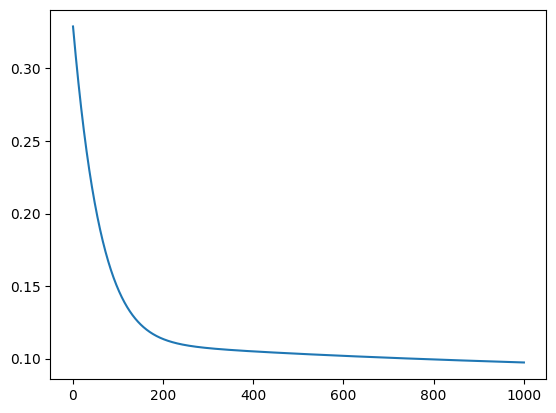

In [143]:
# Visualization of learning curve
plt.plot(np.arange(1, epochs+1), errors)
plt.show()

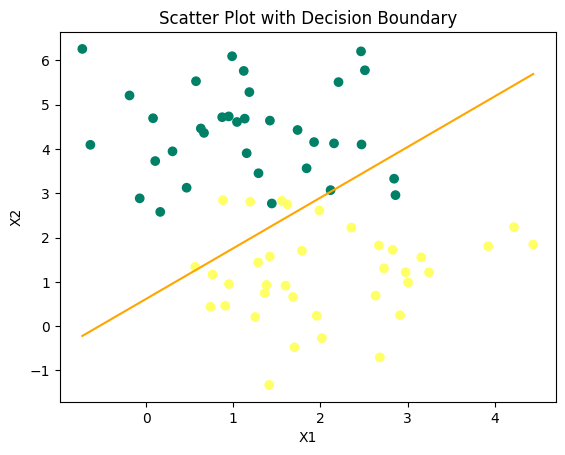

In [144]:
# final model visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = -(params["W"][0] * x_values + params["b"]) / params["W"][1]

plt.plot(x_values, y_values, c='orange')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot with Decision Boundary')
plt.show()

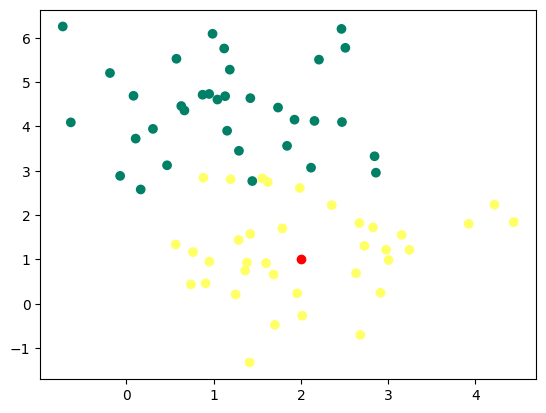

[0.91160093]


array([ True])

In [145]:
new_plant = np.array([2, 1])
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.show()
predict(new_plant, params)

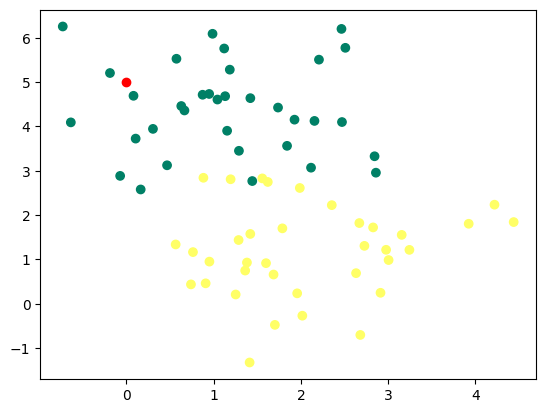

[0.00456292]


array([False])

In [146]:
new_plant = np.array([0, 5])
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.show()
predict(new_plant, params)

[[9.24545311e-01]
 [9.82986767e-01]
 [2.80599755e-03]
 [3.00211105e-02]
 [2.64661250e-02]
 [9.53871574e-01]
 [9.95696422e-01]
 [9.15487749e-02]
 [8.59583080e-01]
 [5.27795780e-04]
 [2.85473742e-02]
 [4.70971045e-01]
 [3.43046115e-02]
 [1.10152708e-02]
 [9.68269154e-01]
 [9.88047353e-01]
 [4.02261054e-01]
 [9.70163835e-01]
 [9.88277833e-01]
 [3.44713712e-02]
 [1.47491883e-01]
 [2.57923079e-03]
 [1.21928440e-01]
 [9.46527618e-01]
 [8.79835657e-01]
 [2.43204543e-03]
 [5.38635281e-02]
 [4.45138941e-01]
 [2.16399566e-03]
 [5.61659269e-01]]


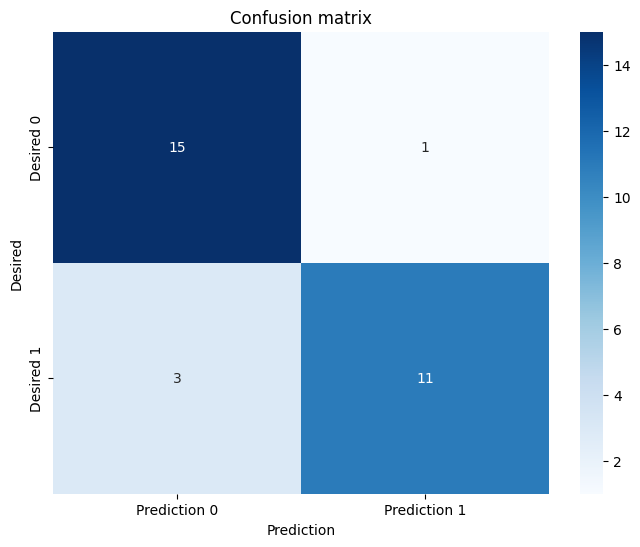

Accuracy score = 0.87


In [147]:
y_pred = predict(X_test, params)

# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Prediction 0', 'Prediction 1'], yticklabels=['Desired 0', 'Desired 1'])
plt.xlabel('Prediction')
plt.ylabel('Desired')
plt.title('Confusion matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score = {accuracy:.2f}")

In [148]:
import plotly.graph_objects as go

In [149]:
fig = go.Figure(data=[go.Scatter3d(
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),
        colorscale='YlGn',
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()